# First encouter with PyTorch


Let us explore the basics of PyTorch.


This notebook is a modified version of [this](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html) more extensive introduction to the language.

In [2]:
%matplotlib inline

### Import the torch library

In [4]:
# !pip install torchsummary

In [42]:
import torch
from torchsummary import summary

In [8]:
device = torch.device('cpu')
#device = torch.device('cuda') # Uncomment this to run on GPU

### Create artificial dataset


In [9]:
n = 1000 # n.of data samples

din = 100 # input dimension
dh = 30 # hidden layer dimension
dout = 10 # output dimension

In [10]:
input_size = (din,)
input_size

(100,)

In [12]:
# create random tensors
x = torch.randn(n, din, device=device)
y = torch.randn(n, dout, device=device)

In [13]:
print(x.shape, y.shape)

torch.Size([1000, 100]) torch.Size([1000, 10])


### Define a simple FC network

In [14]:
model = torch.nn.Sequential(
          torch.nn.Linear(din, dh, bias=True),
          torch.nn.Sigmoid(),
          torch.nn.Linear(dh, dout),
        ).to(device)

In [15]:
print(model)

Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=10, bias=True)
)


In [16]:
summary(model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
           Sigmoid-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


### Questions/Answers

- Explain the number of parameters reported
- Scaling of the number of parameters with the number of hidden units
- Define an identical network with ReLU activation function

In [17]:
model = torch.nn.Sequential(
          torch.nn.Linear(din, dh, bias=True),
          torch.nn.ReLU(),
          torch.nn.Linear(dh, dout),
        ).to(device)

In [18]:
summary(model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
              ReLU-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


### Evaluate the network on data


Compute the f(x)


The network is a function of x. Evaluating it is as plain as possible.

In [20]:
y_pred = model(x)
y_pred

tensor([[-0.1020,  0.1290, -0.2603,  ...,  0.3331,  0.5576, -0.2758],
        [-0.4152,  0.1483, -0.0056,  ..., -0.0168,  0.0873,  0.1102],
        [-0.3159,  0.1761, -0.2020,  ...,  0.5462,  0.0528,  0.1424],
        ...,
        [-0.0743, -0.2728, -0.2125,  ..., -0.0460,  0.1472,  0.1659],
        [-0.7044, -0.4282, -0.0603,  ...,  0.3079,  0.1602, -0.2382],
        [-0.1675, -0.0343, -0.0538,  ...,  0.1587,  0.2943,  0.3860]],
       grad_fn=<AddmmBackward>)

In [21]:
print(y_pred.shape)

torch.Size([1000, 10])


### Define a loss function

|| y_pred, y ||

In [22]:
loss_fn = torch.nn.MSELoss(reduction='mean')

In [27]:
y.shape, y_pred.shape

(torch.Size([1000, 10]), torch.Size([1000, 10]))

In [23]:
loss = loss_fn(y_pred,y)
loss

tensor(1.0881, grad_fn=<MseLossBackward>)

In [25]:
print(loss.item())

1.0880557298660278


### Training

L, grad L, update rule $\theta$ = $\theta$ - $\alpha$ (lr) grad L

In [28]:
lr = 1e-4
nepochs = 5000
training_loss = []

In [29]:
for t in range(nepochs):
    
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    training_loss.append(loss.item())
    
    
    # ---------------------------------   Modification of the parameters due to the loss
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its data and gradients like we did before.
    
    with torch.no_grad():
        for param in model.parameters():
            param.data -= lr * param.grad
            
    # -----------------------------------------------------------------------------------

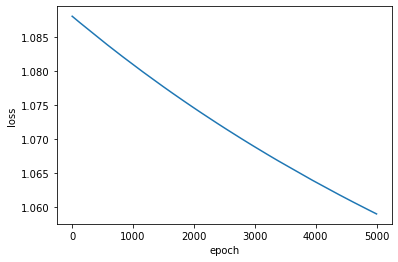

In [34]:
from matplotlib import pyplot as plt
plt.plot(training_loss,'-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

This example is meant just to illustrate the basic PyTorch machinery at work: it is not representative of true learning problems since there is no separate test set against which to evaluate the algorithm. We will use the MNIST dataset for our following experiments.

# Another way of defining a network

This is another way to define a network in PyTorch: we define a class with its methods. 
It will be useful when we will create new methods to extract representations.

In [35]:
summary(model, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
              ReLU-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [44]:
import torch.nn as nn

In [38]:
#model.forward(x)

In [54]:
class Net(nn.Module):
    def __init__(self, din=784, dh=30, dout=10):
        super(Net, self).__init__()
        
        # I declare here what I need to construct my network
        
        self.lin1 = nn.Linear(din, dh)
        self.lin2 = nn.Linear(dh, dout)
       
    
    def forward(self, x):
        
        # I specify in the forward-pass how to use the layers defined in __init__
        
        x = torch.sigmoid(self.lin1(x)) 
        return self.lin2(x)
    
    #-----------------------------------------------------#
    def extract(self,x):
        '''
        Extracts the activations of the hidden layer
        '''
       
        return torch.sigmoid(self.lin1(x)) 

In [55]:
model2 = Net(din,dh,dout).to(device)

In [61]:
print(model)

Sequential(
  (0): Linear(in_features=100, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=10, bias=True)
)


In [62]:
print(model2)

Net(
  (lin1): Linear(in_features=100, out_features=30, bias=True)
  (lin2): Linear(in_features=30, out_features=10, bias=True)
)


In [63]:
input_size

(100,)

In [57]:
print(summary(model, input_size))
print('\n\n')
print(summary(model2, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
              ReLU-2                   [-1, 30]               0
            Linear-3                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
None



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 30]           3,030
            Linear-2                   [-1, 10]             310
Total params: 3,340
Trainable params: 3,340
Non-trainable params: 0
---------------------------------

In [59]:
model2.extract(x).shape

torch.Size([1000, 30])

In [60]:
assert(model2.extract(x).shape[1] == dh)